### Data Extraction

In [1]:
import pandas as pd

crime_data = pd.read_csv("crime_date_aligned.csv")




In [2]:
crime_data.head()



,Unnamed: 0,dr_no,date_rptd,date_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,vict_descent.1,location,lat,lon,zip_code
0,114613,130814829,2013-09-30,2013-09-27,8,West LA,838,310,BURGLARY,26,M,W,W,1000 GAYLEY AV,34.0620,-118.4480,90024
1,410108,131906991,2013-02-21,2013-02-20,19,Mission,1972,310,BURGLARY,52,M,W,W,9000 LEMONA AV,34.2336,-118.4592,91343
2,410359,130911659,2013-06-04,2013-06-04,9,Van Nuys,952,310,BURGLARY,58,M,H,H,5400 HALBRENT AV,34.1685,-118.4648,91411
3,410528,140107110,2014-02-15,2013-12-31,1,Central,192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",21,F,B,B,HOPE,34.0363,-118.2672,90079
4,411029,131718232,2013-11-05,2013-11-04,17,Devonshire,1795,933,PROWLER,54,F,W,W,17200 ROSCOE BL,34.2212,-118.5078,91325


In [3]:
crime_data.info()  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920994 entries, 0 to 1920993
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   dr_no           int64  
 2   date_rptd       object 
 3   date_occ        object 
 4   area            int64  
 5   area_name       object 
 6   rpt_dist_no     int64  
 7   crm_cd          int64  
 8   crm_cd_desc     object 
 9   vict_age        int64  
 10  vict_sex        object 
 11  vict_descent    object 
 12  vict_descent.1  object 
 13  location        object 
 14  lat             float64
 15  lon             float64
 16  zip_code        int64  
dtypes: float64(2), int64(7), object(8)
memory usage: 249.2+ MB


In [4]:
crime_data.describe()



,Unnamed: 0,dr_no,area,rpt_dist_no,crm_cd,vict_age,lat,lon,zip_code
count,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06,1.920994e+06
mean,1.063285e+06,1.769103e+08,1.088948e+01,1.135328e+03,5.060181e+02,3.503614e+01,3.403476e+01,-1.182108e+02,9.050248e+04
std,6.084224e+05,2.822553e+07,6.079735e+00,6.078808e+02,2.203302e+02,1.921743e+01,1.207512e+00,4.177020e+00,6.657040e+02
min,0.000000e+00,1.208575e+06,1.000000e+00,1.000000e+02,1.100000e+02,-7.000000e+00,0.000000e+00,-1.188279e+02,9.000100e+04
25%,5.522682e+05,1.515171e+08,6.000000e+00,6.360000e+02,3.300000e+02,2.400000e+01,3.401370e+01,-1.184355e+02,9.002500e+04
50%,1.058418e+06,1.801314e+08,1.100000e+01,1.151000e+03,4.400000e+02,3.400000e+01,3.406130e+01,-1.183282e+02,9.004900e+04
75%,1.590237e+06,2.011058e+08,1.600000e+01,1.653000e+03,6.490000e+02,4.800000e+01,3.416980e+01,-1.182767e+02,9.132400e+04
max,2.119796e+06,2.321048e+08,2.100000e+01,2.199000e+03,9.560000e+02,9.900000e+01,3.468280e+01,0.000000e+00,9.700300e+04


### Elbow Method

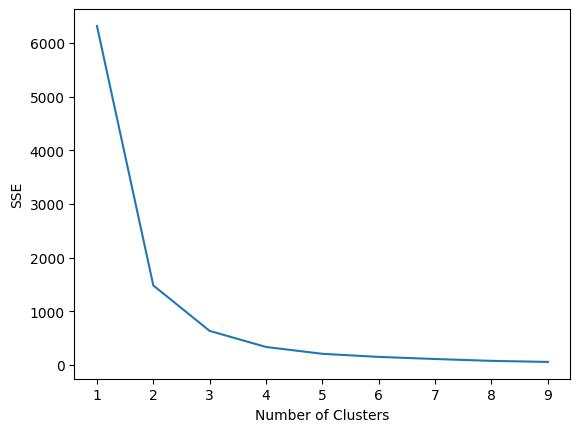

High Risk Zone      35697
Medium Risk Zone    23740
Low Risk Zone       17234
Name: risk_zone, dtype: int64


In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the crime dataset
crime_data = pd.read_csv('crime_date_aligned.csv')

# Drop unnecessary columns
crime_data = crime_data.drop(['Unnamed: 0', 'vict_age', 'vict_sex', 'vict_descent', 'vict_descent.1'], axis=1)

# Group the crimes by area and date_occ
grouped_crime_data = crime_data.groupby(['area', 'date_occ']).size().reset_index(name='counts')

# Estimate the density of crimes using KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(grouped_crime_data[['counts']])

# Compute the density of crimes for each area
area_crime_density = np.exp(kde.score_samples(grouped_crime_data[['counts']]))

# Normalize the crime density distribution of each area
scaler = MinMaxScaler()
area_crime_density = scaler.fit_transform(area_crime_density.reshape(-1, 1))

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(area_crime_density)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Cluster the areas based on their crime density distribution
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(area_crime_density)

# Assign each area to its respective risk zone based on its cluster
grouped_crime_data['cluster'] = kmeans.labels_
grouped_crime_data['risk_zone'] = grouped_crime_data['cluster'].map({0: 'Low Risk Zone', 1: 'Medium Risk Zone', 2: 'High Risk Zone'})

# Print the number of areas in each risk zone
print(grouped_crime_data['risk_zone'].value_counts())


### Trials

In [ ]:
import pandas as pd
import numpy as np
import folium
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Load the crime dataset
df = pd.read_csv('crime_date_aligned.csv')

# Compute the kernel density estimation (KDE) for the zip codes
zipcodes = df['zip_code'].unique()
kde = KernelDensity(kernel='gaussian', bandwidth=0.02)
kde.fit(df['zip_code'].values.reshape(-1,1))

# Compute the KDE score for each zip code and add it to the dataframe
df['kde_score'] = np.exp(kde.score_samples(df['zip_code'].values.reshape(-1,1)))

# Cluster the zip codes based on the KDE score using KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['kde_score']])
df['cluster'] = kmeans.labels_

# Classify each zip code into high, medium, or low risk zone based on the cluster labels
high_risk = df.loc[df['cluster'] == 2]['zip_code'].unique()
medium_risk = df.loc[df['cluster'] == 1]['zip_code'].unique()
low_risk = df.loc[df['cluster'] == 0]['zip_code'].unique()

def classify_risk_zone(zipcode):
    if zipcode in high_risk:
        return 'High Risk Zone'
    elif zipcode in medium_risk:
        return 'Medium Risk Zone'
    else:
        return 'Low Risk Zone'

# Add a new column 'risk_zone' based on the risk classification of each zip code
df['risk_zone'] = df['zip_code'].apply(classify_risk_zone)

# Create a map of Los Angeles county
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create a HeatMap of crime reports in the high risk zone
high_risk_crime = df.loc[df['risk_zone'] == 'High Risk Zone'][['lat', 'lon']].values.tolist()
HeatMap(high_risk_crime, name='High Risk Zone Crime Reports').add_to(la_map)

# Create a MarkerCluster of crime reports in the medium risk zone
medium_risk_crime = df.loc[df['risk_zone'] == 'Medium Risk Zone'][['lat', 'lon']].values.tolist()
marker_cluster = MarkerCluster(name='Medium Risk Zone Crime Reports').add_to(la_map)
for point in medium_risk_crime:
    folium.Marker(location=point).add_to(marker_cluster)

# Create a MarkerCluster of crime reports in the low risk zone
low_risk_crime = df.loc[df['risk_zone'] == 'Low Risk Zone'][['lat', 'lon']].values.tolist()
marker_cluster = MarkerCluster(name='Low Risk Zone Crime Reports').add_to(la_map)
for point in low_risk_crime:
    folium.Marker(location=point).add_to(marker_cluster)

# Add a layer control panel to the map
folium.LayerControl().add_to(la_map)

# Display the map
la_map


In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

# Load the dataset
crime_df = pd.read_csv('crime_date_aligned.csv')

# Extract the zip codes
zip_codes = crime_df['zip_code'].unique()

# Create an empty dataframe to store the results
result_df = pd.DataFrame(columns=['zip_code', 'risk_zone'])

# Loop over the zip codes and fit a KDE model
for zip_code in zip_codes:
    # Extract the crime counts for the current zip code
    counts = crime_df[crime_df['zip_code'] == zip_code]['zip_code'].count()
    
    # Fit a KDE model on the crime counts
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(counts.reshape(-1, 1))
    
    # Classify the zip code based on the KDE score
    score = kde.score([[counts]])
    if score >= 6:
        risk_zone = 'High Risk Zone'
    elif score > 3 and score < 6:
        risk_zone = 'Medium Risk Zone'
    else:
        risk_zone = 'Low Risk Zone'
    
    # Append the results to the dataframe
    result_df = result_df.append({'zip_code': zip_code, 'risk_zone': risk_zone}, ignore_index=True)

# Merge the results with the original dataframe
crime_df = crime_df.merge(result_df, on='zip_code')

# Print the head of the updated dataframe
print(crime_df.head())



   Unnamed: 0      dr_no   date_rptd    date_occ  area area_name  rpt_dist_no  \
0      114613  130814829  2013-09-30  2013-09-27     8   West LA          838   
1      443476  130812047  2013-07-24  2013-07-01     8   West LA          836   
2      498936  130809594  2013-05-20  2013-05-20     8   West LA          855   
3      542520  130806032  2013-02-20  2013-02-19     8   West LA          817   
4      548535  130811356  2013-07-06  2013-05-31     8   West LA          819   

   crm_cd                                        crm_cd_desc  vict_age  \
0     310                                           BURGLARY        26   
1     354                                  THEFT OF IDENTITY        51   
2     888                                        TRESPASSING        31   
3     341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...        52   
4     354                                  THEFT OF IDENTITY        69   

  vict_sex vict_descent vict_descent.1  \
0        M            W   

In [24]:
num_rows = len(crime_df)
print("Number of rows:", num_rows)

Number of rows: 1920994


In [10]:
crime_df

,Unnamed: 0,dr_no,date_rptd,date_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,vict_descent.1,location,lat,lon,zip_code,risk_zone
0,114613,130814829,2013-09-30,2013-09-27,8,West LA,838,310,BURGLARY,26,M,W,W,1000 GAYLEY AV,34.0620,-118.4480,90024,Low Risk Zone
1,443476,130812047,2013-07-24,2013-07-01,8,West LA,836,354,THEFT OF IDENTITY,51,F,W,W,1900 HOLMBY AV,34.0546,-118.4246,90024,Low Risk Zone
2,498936,130809594,2013-05-20,2013-05-20,8,West LA,855,888,TRESPASSING,31,M,W,W,1600 GLENDON AV,34.0531,-118.4384,90024,Low Risk Zone
3,542520,130806032,2013-02-20,2013-02-19,8,West LA,817,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",52,F,W,W,1000 GLENDON AV,34.0625,-118.4440,90024,Low Risk Zone
4,548535,130811356,2013-07-06,2013-05-31,8,West LA,819,354,THEFT OF IDENTITY,69,M,W,W,10400 WILSHIRE BL,34.0669,-118.4288,90024,Low Risk Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920989,939266,141308918,2014-03-31,2014-03-31,13,Newton,1347,320,"BURGLARY, ATTEMPTED",0,M,H,H,LONG BEACH AV,34.0011,-118.1745,90101,Low Risk Zone
1920990,952198,142017325,2014-10-04,2014-10-04,20,Olympic,2017,330,BURGLARY FROM VEHICLE,48,M,K,K,BEVERLY,33.8757,-118.1291,90706,Low Risk Zone
1920991,953848,141426825,2014-10-22,2014-10-20,14,Pacific,1496,440,THEFT PLAIN - PETTY ($950 & UNDER),0,X,X,X,12900 PARK PLAZA DR,33.8676,-118.0581,90703,Low Risk Zone
1920992,998457,140716040,2014-11-06,2014-11-03,7,Wilshire,778,210,ROBBERY,17,M,H,H,CRENSHAW BL,33.9618,-118.3288,90305,Low Risk Zone


In [2]:
df2 = pd.read_csv('zipcode_population.csv')

### KDE 

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

# Load the dataset
df = pd.read_csv('crime_date_aligned.csv')

# Calculate the total number of crimes reported for each zip code
zip_counts = df['zip_code'].value_counts()

# Calculate the KDE for the crime counts
kde = gaussian_kde(zip_counts)

# Define the threshold values for each risk area
high_risk_threshold = kde.resample(1)[0][0]
moderate_risk_threshold = kde.resample(1)[0][0]
low_risk_threshold = kde.resample(1)[0][0]

# Classify each zip code into one of the risk areas based on the crime count
risk_zone = []
for zip_code in df['zip_code']:
    crime_count = zip_counts.get(zip_code, 0)
    if crime_count >= high_risk_threshold:
        risk_zone.append('High Risk Zone')
    elif crime_count >= moderate_risk_threshold:
        risk_zone.append('Moderate Risk Zone')
    else:
        risk_zone.append('Low Risk Zone')

# Add the 'risk_zone' column to the dataframe
df['risk_zone'] = risk_zone


In [12]:
df

,Unnamed: 0,dr_no,date_rptd,date_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,vict_descent.1,location,lat,lon,zip_code,risk_zone
0,114613,130814829,2013-09-30,2013-09-27,8,West LA,838,310,BURGLARY,26,M,W,W,1000 GAYLEY AV,34.0620,-118.4480,90024,Low Risk Zone
1,410108,131906991,2013-02-21,2013-02-20,19,Mission,1972,310,BURGLARY,52,M,W,W,9000 LEMONA AV,34.2336,-118.4592,91343,High Risk Zone
2,410359,130911659,2013-06-04,2013-06-04,9,Van Nuys,952,310,BURGLARY,58,M,H,H,5400 HALBRENT AV,34.1685,-118.4648,91411,High Risk Zone
3,410528,140107110,2014-02-15,2013-12-31,1,Central,192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",21,F,B,B,HOPE,34.0363,-118.2672,90079,Low Risk Zone
4,411029,131718232,2013-11-05,2013-11-04,17,Devonshire,1795,933,PROWLER,54,F,W,W,17200 ROSCOE BL,34.2212,-118.5078,91325,Moderate Risk Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920989,638238,220211676,2022-06-09,2022-06-09,2,Rampart,239,210,ROBBERY,33,M,H,H,100 N BEAUDRY AV,34.0591,-118.2542,90071,High Risk Zone
1920990,638239,221213384,2022-06-07,2022-06-07,12,77th Street,1249,626,INTIMATE PARTNER - SIMPLE ASSAULT,57,F,B,B,6600 S HOOVER ST,33.9792,-118.2871,90037,High Risk Zone
1920991,638240,220314584,2022-08-02,2022-08-02,3,Southwest,334,354,THEFT OF IDENTITY,34,F,H,H,4300 W 28TH ST,34.0311,-118.3335,90019,High Risk Zone
1920992,638241,221017286,2022-12-05,2022-12-01,10,West Valley,1047,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,W,W,17200 BURBANK BL,34.1722,-118.5077,91406,High Risk Zone


In [20]:
high_risk_count = len(df[df['zip_code'] == 91325])


In [16]:
high_risk_count

14817

In [18]:
high_risk_count

32901

In [21]:
high_risk_count

17107

In [22]:
df.to_csv('zipcode_risk_area_Clustering.csv', index=False)  # Set index to False if you don't want to include row numbers


In [23]:
num_rows = len(df)
print("Number of rows:", num_rows)

Number of rows: 1920994


### Getis - Ordis

In [9]:
import pandas as pd
import pysal.lib
import pysal.explore
import pysal.viz

# load the crime data from a CSV file
crime_df = pd.read_csv('crime_dat.csv')

# group the crimes by zip code
zip_crime_counts = crime_df.groupby('zip_code').size().reset_index(name='crime_count')

# perform Getis-Ord analysis to identify spatial clusters of high crime activity
W = pysal.lib.weights.Queen.from_dataframe(zip_crime_counts)
g_local = pysal.explore.esda.G_Local(zip_crime_counts['crime_count'].values, W, permutations=999)
z_scores = g_local.Zs
significant_clusters = (z_scores > 1.96) | (z_scores < -1.96)

# classify each zip code into high, medium, or low-risk zones based on the crime count and significant clusters
zip_risk_zones = []
for i, row in zip_crime_counts.iterrows():
    zip_code = row['zip_code']
    crime_count = row['crime_count']
    if significant_clusters[i]:
        if crime_count > zip_crime_counts['crime_count'].quantile(0.75):
            risk_zone = 'High Risk Zone'
        elif crime_count > zip_crime_counts['crime_count'].quantile(0.25):
            risk_zone = 'Medium Risk Zone'
        else:
            risk_zone = 'Low Risk Zone'
    else:
        risk_zone = 'Low Risk Zone'
    zip_risk_zones.append(risk_zone)

# add the risk zone column to the zip_crime_counts dataframe
zip_crime_counts['risk_zone'] = zip_risk_zones

# merge the risk zone information back into the original crime dataframe
crime_df = pd.merge(crime_df, zip_crime_counts, on='zip_code')

# save the updated crime dataframe to a CSV file
crime_df.to_csv('crime_data_with_risk_zones.csv', index=False)


,Unnamed: 0,dr_no,date_rptd,date_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,vict_age,vict_sex,vict_descent,vict_descent.1,location,lat,lon,zip_code,risk_zone
0,114613,130814829,2013-09-30,2013-09-27,8,West LA,838,310,BURGLARY,26,M,W,W,1000 GAYLEY AV,34.0620,-118.4480,90024,High Risk Zone
1,410108,131906991,2013-02-21,2013-02-20,19,Mission,1972,310,BURGLARY,52,M,W,W,9000 LEMONA AV,34.2336,-118.4592,91343,High Risk Zone
2,410359,130911659,2013-06-04,2013-06-04,9,Van Nuys,952,310,BURGLARY,58,M,H,H,5400 HALBRENT AV,34.1685,-118.4648,91411,High Risk Zone
3,410528,140107110,2014-02-15,2013-12-31,1,Central,192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",21,F,B,B,HOPE,34.0363,-118.2672,90079,High Risk Zone
4,411029,131718232,2013-11-05,2013-11-04,17,Devonshire,1795,933,PROWLER,54,F,W,W,17200 ROSCOE BL,34.2212,-118.5078,91325,High Risk Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920989,638238,220211676,2022-06-09,2022-06-09,2,Rampart,239,210,ROBBERY,33,M,H,H,100 N BEAUDRY AV,34.0591,-118.2542,90071,High Risk Zone
1920990,638239,221213384,2022-06-07,2022-06-07,12,77th Street,1249,626,INTIMATE PARTNER - SIMPLE ASSAULT,57,F,B,B,6600 S HOOVER ST,33.9792,-118.2871,90037,High Risk Zone
1920991,638240,220314584,2022-08-02,2022-08-02,3,Southwest,334,354,THEFT OF IDENTITY,34,F,H,H,4300 W 28TH ST,34.0311,-118.3335,90019,High Risk Zone
1920992,638241,221017286,2022-12-05,2022-12-01,10,West Valley,1047,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,68,M,W,W,17200 BURBANK BL,34.1722,-118.5077,91406,High Risk Zone


### Severity Score

In [15]:
df_zip = pd.read_csv('crime_date_aligned.csv')
df_pop = pd.read_csv('zipcode_population.csv')

In [22]:
# Group the crime_df dataframe by zip code and count the number of crimes reported in each zip code
crime_count = df_zip.groupby('zip_code').size().reset_index(name='crime_count')

# Merge the crime_count dataframe with the density_df dataframe based on the common zip code column
merged_df = pd.merge(crime_count, df_pop, left_on='zip_code', right_on='zipcode', how="outer")

# Calculate the severity score based on population density and number of crimes reported in each zip code:
merged_df['severity_score'] = merged_df['crime_count'] / merged_df['population_density']

# Classify severity score into risk zones
high_risk = merged_df['severity_score'] > 0.1
moderate_risk = (merged_df['severity_score'] <= 0.1) & (merged_df['severity_score'] > 0.05)
low_risk = merged_df['severity_score'] <= 0.05

merged_df['risk_zone'] = np.select([high_risk, moderate_risk, low_risk], ['high', 'moderate', 'low'])

# Print the resulting dataframe to check the severity score and risk zone:
print(merged_df)


     zip_code  crime_count  zipcode  population  population_density  \
0       90001          595    90001     57110.0             16306.0   
1       90002        20100    90002     51223.0             16728.0   
2       90003        58403    90003     66266.0             18660.0   
3       90004        28336    90004     62180.0             20400.0   
4       90005        25526    90005     37681.0             34761.0   
..        ...          ...      ...         ...                 ...   
192     91792            1    91792     30854.0              8031.0   
193     91801            1    91801     52735.0             12101.0   
194     93534            1    93534     39341.0              2215.0   
195     93550            3    93550     74929.0               382.0   
196     97003         2394    97003         NaN                 NaN   

     land_area_in_sqmi  median_housePrice  severity_score risk_zone  
0                 3.50           249600.0        0.036490       low  
1      

In [23]:
merged_df 



,zip_code,crime_count,zipcode,population,population_density,land_area_in_sqmi,median_housePrice,severity_score,risk_zone
0,90001,595,90001,57110.0,16306.0,3.50,249600.0,0.036490,low
1,90002,20100,90002,51223.0,16728.0,3.06,216100.0,1.201578,high
2,90003,58403,90003,66266.0,18660.0,3.55,231700.0,3.129850,high
3,90004,28336,90004,62180.0,20400.0,3.05,776300.0,1.389020,high
4,90005,25526,90005,37681.0,34761.0,1.08,633600.0,0.734329,high
...,...,...,...,...,...,...,...,...,...
192,91792,1,91792,30854.0,8031.0,3.84,359500.0,0.000125,low
193,91801,1,91801,52735.0,12101.0,4.36,468500.0,0.000083,low
194,93534,1,93534,39341.0,2215.0,17.76,131800.0,0.000451,low
195,93550,3,93550,74929.0,382.0,196.17,137200.0,0.007853,low


In [24]:
# Group the merged_df dataframe by risk_zone and count the number of zip codes in each risk zone
risk_zone_counts = merged_df['risk_zone'].value_counts()

# Print the count of low, moderate, and high-risk zones
print('Low risk zone count:', risk_zone_counts['low'])
print('Moderate risk zone count:', risk_zone_counts['moderate'])
print('High risk zone count:', risk_zone_counts['high'])


Low risk zone count: 56
Moderate risk zone count: 5
High risk zone count: 124
